In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set(style="whitegrid")

%config IPCompleter.greedy=True

In [3]:
Items = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\items.csv")
ItemCat = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\item_categories.csv")
SalesTrain = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\sales_train_v2.csv")
Shops = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\shops.csv")
SalesTest = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\test.csv")
SampleSubmission = pd.read_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\sample_submission.csv")

In [4]:
SalesTrain.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [6]:
SalesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


### Check if any of the files contain any missing values

In [3]:
SalesTrain[SalesTrain.isnull().any(axis=1)].head()     #NO MISSING VALUE

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [8]:
SalesTest[SalesTest.isnull().any(axis=1)].head()   #NO MISSING VALUE

,ID,shop_id,item_id


In [12]:
Items[Items.isnull().any(axis=1)].head()   #NO MISSING VALUE

,item_name,item_id,item_category_id


In [13]:
ItemCat[ItemCat.isnull().any(axis=1)].head()    #NO MISSING VALUE

,item_category_name,item_category_id


In [14]:
Shops[Shops.isnull().any(axis=1)].head()    #NO MISSING VALUE

,shop_name,shop_id


### Check any presence of outliers in the data

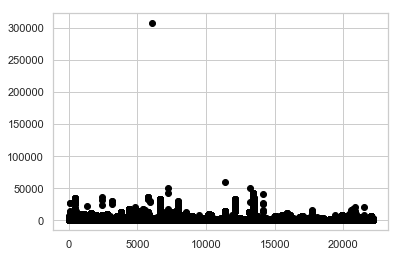

In [15]:
plt.plot(SalesTrain['item_id'], SalesTrain['item_price'], 'o', color='black');

In [16]:
SalesTrain[SalesTrain.item_price > 40000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885138,17.09.2013,8,12,11365,59200.0,1.0
1006638,24.10.2013,9,12,7238,42000.0,1.0
1163158,13.12.2013,11,12,6066,307980.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0
2143903,20.11.2014,22,12,14173,40900.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2885692,23.10.2015,33,42,13403,42990.0,1.0
2893100,20.10.2015,33,38,13403,41990.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0
2910156,29.10.2015,33,12,13403,42990.0,1.0


In [17]:
Items[Items.item_id == 6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [18]:
ItemCat[ItemCat.item_category_id == 75]

,item_category_name,item_category_id
75,Программы - Для дома и офиса,75


In [19]:
SalesTrain[SalesTrain.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [20]:
Shops[Shops.shop_id == 12]

,shop_name,shop_id
12,Интернет-магазин ЧС,12


#### The record which appeared to be an outlier seems to be a genuine sale

In [21]:
SampleSubmission.head(10)    

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
5,5,0.5
6,6,0.5
7,7,0.5
8,8,0.5
9,9,0.5


In [4]:
SalesTrain.sort_values(by = 'item_price', ascending = False, inplace = False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0
885138,17.09.2013,8,12,11365,59200.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2931380,20.10.2015,33,22,13403,42990.0,1.0


### Convert the date object to datetime column in DF SalesTrain

In [5]:
SalesTrain['date'] =  pd.to_datetime(SalesTrain['date'],format= '%d.%m.%Y')


In [24]:
SalesTrain.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

### Change the data in an aggregate format group by month

In [6]:
 SalesTrain['month'] = pd.DatetimeIndex(SalesTrain['date']).month
 SalesTrain['year'] = pd.DatetimeIndex(SalesTrain['date']).year

In [26]:
SalesTrain.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,1,2013
5,2013-01-10,0,25,2564,349.00,1.0,1,2013
6,2013-01-02,0,25,2565,549.00,1.0,1,2013
7,2013-01-04,0,25,2572,239.00,1.0,1,2013
8,2013-01-11,0,25,2572,299.00,1.0,1,2013
9,2013-01-03,0,25,2573,299.00,3.0,1,2013


In [7]:
SalesTrainSub = SalesTrain.iloc[:,1:8]

In [28]:
SalesTrainSub.head(3)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
0,0,59,22154,999.0,1.0,1,2013
1,0,25,2552,899.0,1.0,1,2013
2,0,25,2552,899.0,-1.0,1,2013


### Data Exploration to understand the trends

#### The variations in item price in 3 years

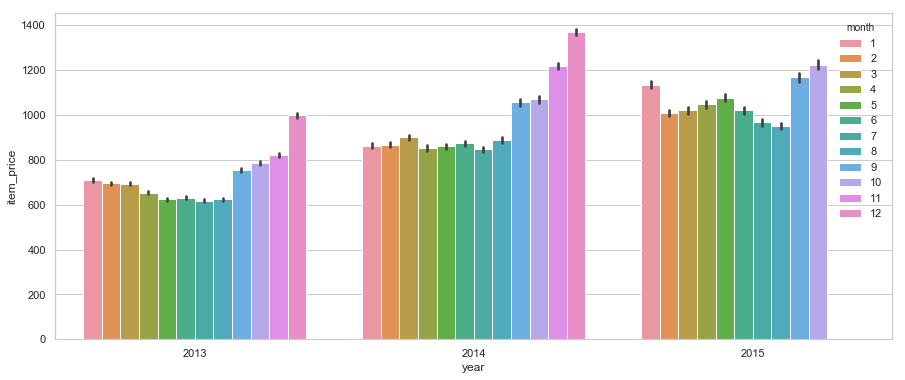

In [72]:
with sns.axes_style("whitegrid", {'axes.grid' : True}):
    fig, ax = plt.subplots(1,1, figsize=(15,6))
month_itemprice = sns.barplot(x="year", y="item_price", hue="month", data=SalesTrainSub)

C:\Users\rgoyal\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


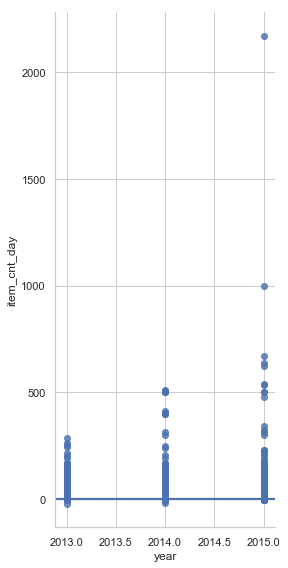

In [9]:
sns.pairplot(SalesTrainSub, x_vars="year", y_vars="item_cnt_day", size=8, aspect=0.5, kind='reg')

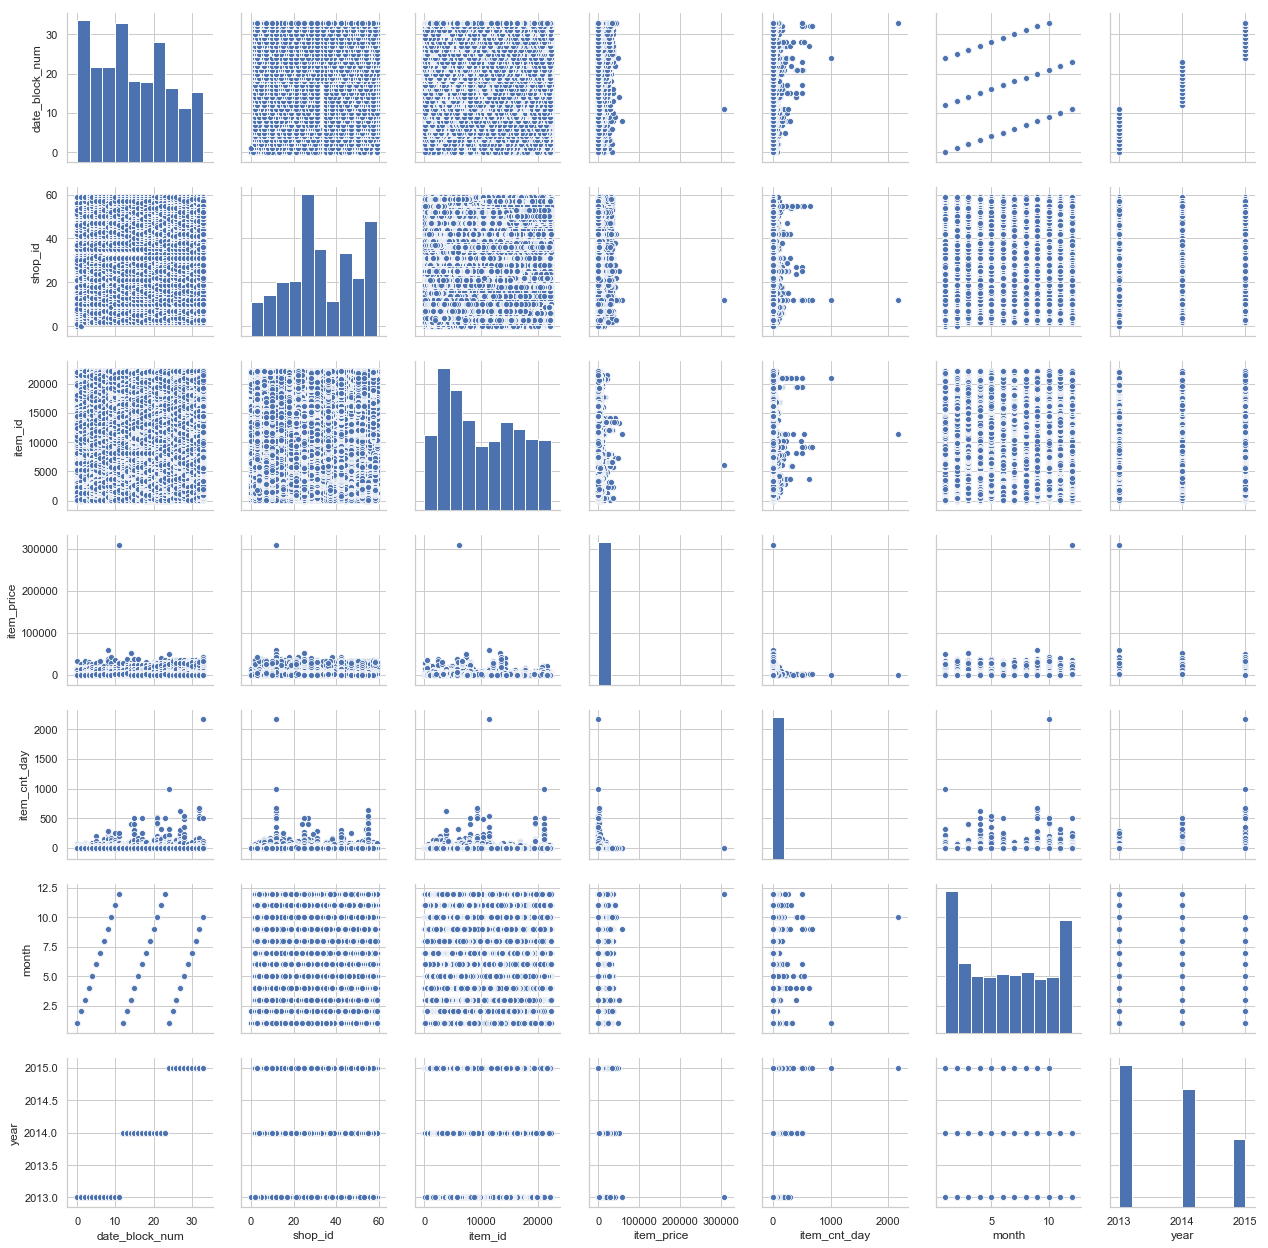

In [51]:
# The correlation plot for the attributes 

corr_plot = sns.pairplot(SalesTrainSub)

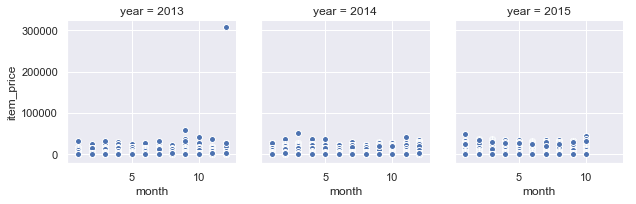

In [110]:
month_itemprice_2 = sns.FacetGrid(SalesTrainSub, col = "year")
month_itemprice_2 = month_itemprice_2.map(plt.scatter, "month", "item_price", edgecolor="w")

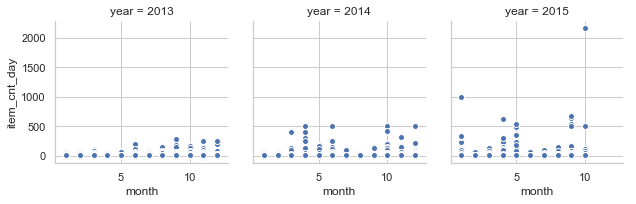

In [53]:
month_itemprice_2 = sns.FacetGrid(SalesTrainSub, col = "year")
month_itemprice_2 = month_itemprice_2.map(plt.scatter, "month", "item_cnt_day", edgecolor="w")

In [ ]:
with sns.axes_style("whitegrid", {'axes.grid' : True}):
    fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.violinplot(x = "shop_id", data=SalesTrainSub, palette="Set3")
plt.show()

In [8]:
# from SalesTrainSub dataset, get the top 20 shops sold most number of items
Top_20_Shops = SalesTrainSub.groupby(['shop_id'])['item_cnt_day'].agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False)[:20]
Top_20_Shops['shop_id'] = Top_20_Shops.index

Top_20_Shops.sort_values(by='item_cnt_day', ascending=False)
Top_20_Shops.reset_index(drop=True, inplace=True)
Top_20_Shops

C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,item_cnt_day,shop_id
0,310777.0,31
1,241920.0,25
2,185790.0,54
3,184557.0,28
4,144934.0,42
5,141107.0,57
6,136657.0,27
7,100489.0,6
8,81734.0,58
9,78990.0,46


No handles with labels found to put in legend.


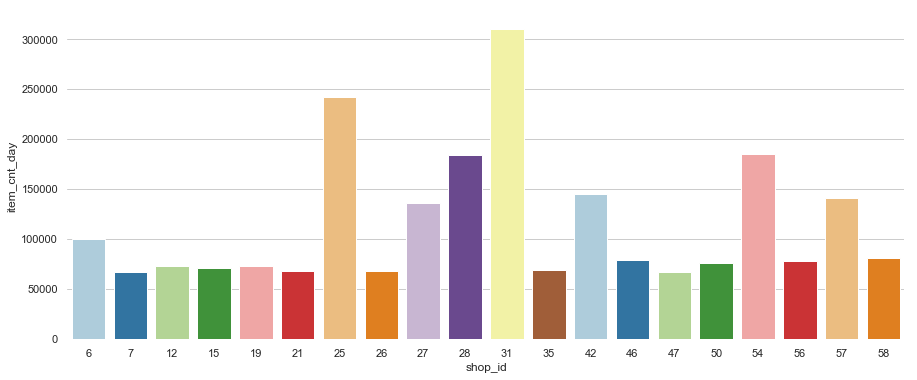

In [33]:
# See the top 20 shops among the 60 who are top sellers

with sns.axes_style("whitegrid", {'axes.grid' : True}):
    fig, ax = plt.subplots(1,1, figsize=(15,6))

sns.set(font_scale=1)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

sns.barplot(x = 'shop_id', y = 'item_cnt_day', data=Top_20_Shops, palette="Paired")
ax.legend(bbox_to_anchor=(1, 0.5))
# from SalesTrainSub dataset, get the top 20 shops sold most number of items
Top_20_Shops = SalesTrainSub.groupby(['shop_id'])['item_cnt_day'].agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False)[:20]
Top_20_Shops['shop_id'] = Top_20_Shops.index

Top_20_Shops.sort_values(by='item_cnt_day', ascending=False)#plt.xticks(rotation=-45)

In [9]:
#Top_20_Shops['shop_id'] = Top_20_Shops.index


Top_items = SalesTrainSub.groupby(['year','item_id'])['item_cnt_day'].agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False)
Top_items['year'] = Top_items.index.get_level_values('year') 
Top_items['item_id'] = Top_items.index.get_level_values('item_id') 
Top_items 

C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


item_cnt_day  year  item_id
year item_id                             
2014 20949         85288.0  2014    20949
2013 20949         63748.0  2013    20949
2015 20949         38606.0  2015    20949
2013 2808          12214.0  2013     2808
     3732          11981.0  2013     3732
2015 3731          10099.0  2015     3731
2013 3734           7649.0  2013     3734
2014 17717          7392.0  2014    17717
2015 17717          7268.0  2015    17717
2014 2814           7096.0  2014     2814
     5822           6542.0  2014     5822
2013 16787          6430.0  2013    16787
     6738           5924.0  2013     6738
     1830           5640.0  2013     1830
2014 6675           5533.0  2014     6675
2013 2445           5330.0  2013     2445
2014 3733           5322.0  2014     3733
     16790          5292.0  2014    16790
     1855           5192.0  2014     1855
     3928           5116.0  2014     3928
2013 3331           5114.0  2013     3331
     15044          4988.0  2013    15044
2015 10210          4876.0  2015    10210
2014 9242           4561.0  2014     9242
2013 1849           4552.0  2013     1849
2014 7018           4469.0  2014     7018
     4181           4434.0  2014     4181
2015 11373          4408.0  2015    11373
2013 6740           4241.0  2013     6740
2015 10209          4213.0  2015    10209
...                    ...   ...      ...
2014 7285              0.0  2014     7285
2013 4591              0.0  2013     4591
2015 12126             0.0  2015    12126
2014 10228             0.0  2014    10228
     3718              0.0  2014     3718
2013 6923              0.0  2013     6923
     12256             0.0  2013    12256
     8515              0.0  2013     8515
     2199              0.0  2013     2199
     13477             0.0  2013    13477
2014 9345              0.0  2014     9345
     19493             0.0  2014    19493
     6666              0.0  2014     6666
2015 15904             0.0  2015    15904
     19303             0.0  2015    19303
     13427             0.0  2015    13427
2013 5518              0.0  2013     5518
2014 6850              0.0  2014     6850
     7547              0.0  2014     7547
2015 7048             -1.0  2015     7048
2013 18062            -1.0  2013    18062
2015 9242             -1.0  2015     9242
2013 11871            -1.0  2013    11871
     13474            -1.0  2013    13474
2014 3738             -1.0  2014     3738
2015 13466            -1.0  2015    13466
     15018            -1.0  2015    15018
2014 5819             -2.0  2014     5819
     11367            -5.0  2014    11367
2013 1590            -11.0  2013     1590

[40328 rows x 3 columns]

### Creating a subset of date_block_num, month, item_id and item_cnt_agg to perform regression


In [10]:

SalesAgg = SalesTrainSub.groupby(['date_block_num', 'month',
                                  'item_id'])['item_cnt_day'].agg({'item_cnt_agg':
                                                                   'sum'}).sort_values(['date_block_num','month','item_id'], ascending=[True, True, True])

SalesAgg['date_block_num'] = SalesAgg.index.get_level_values('date_block_num') 
SalesAgg['month'] = SalesAgg.index.get_level_values('month') 
SalesAgg['item_id'] = SalesAgg.index.get_level_values('item_id') 

SalesAgg.reset_index(drop=True, inplace=True)
SalesAgg = SalesAgg.reindex_axis(['date_block_num','month','item_id','item_cnt_agg'], axis=1)

SalesAgg

C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,date_block_num,month,item_id,item_cnt_agg
0,0,1,19,1.0
1,0,1,27,7.0
2,0,1,28,8.0
3,0,1,29,4.0
4,0,1,32,299.0
5,0,1,33,61.0
6,0,1,34,9.0
7,0,1,35,78.0
8,0,1,40,4.0
9,0,1,41,9.0


### Checking the assumptions of linear regression

#### 1. Linearity
#### 2. Normality
#### 3. Homoscedasticity
#### 4. Multi-collinearity


In [11]:
# from SalesTrainSub dataset, get the top 20 shops sold most number of items
Top_items_only = SalesTrain.groupby(['item_id'])['item_cnt_day'].agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False)
Top_items_only['item_id'] = Top_items_only.index
Top_items_only.reset_index(drop=True, inplace=True)
Top_items_only


C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,item_cnt_day,item_id
0,187642.0,20949
1,17245.0,2808
2,16642.0,3732
3,15830.0,17717
4,14515.0,5822
5,11688.0,3734
6,10289.0,6675
7,10099.0,3731
8,10032.0,1855
9,9227.0,16787


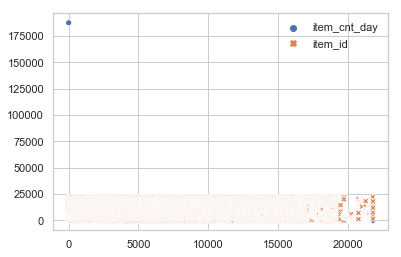

In [17]:
sns.scatterplot(data=Top_items_only);

In [18]:
Top_items_only[Top_items_only['item_cnt_day'] > 175000]

,item_cnt_day,item_id
0,187642.0,20949


In [29]:
Top_items_only.drop([0])

,item_cnt_day,item_id
1,17245.0,2808
2,16642.0,3732
3,15830.0,17717
4,14515.0,5822
5,11688.0,3734
6,10289.0,6675
7,10099.0,3731
8,10032.0,1855
9,9227.0,16787
10,9012.0,7856


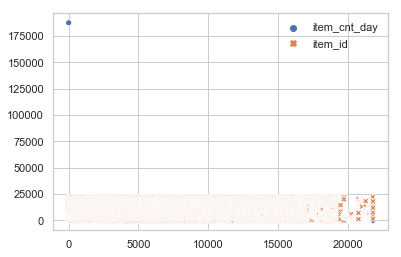

In [30]:
sns.scatterplot(data=Top_items_only);

## Decision Tree Classification 

In [8]:
monthly_sales=SalesTrainSub.groupby(["date_block_num","shop_id","item_id"])["item_cnt_day"].agg({"item_cnt_day":"sum"})

monthly_sales['date_block_num'] = monthly_sales.index.get_level_values('date_block_num') 
monthly_sales['shop_id'] = monthly_sales.index.get_level_values('shop_id') 
monthly_sales['item_id'] = monthly_sales.index.get_level_values('item_id') 
monthly_sales.reset_index(drop=True, inplace=True)

monthly_sales = monthly_sales.reindex_axis(['date_block_num','shop_id','item_id','item_cnt_day'], axis=1)
monthly_sales

C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:8: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
5,0,0,61,1.0
6,0,0,75,1.0
7,0,0,88,1.0
8,0,0,95,1.0
9,0,0,96,1.0


In [9]:
from sklearn import tree

In [12]:
model = tree.DecisionTreeClassifier(criterion='gini') 

cols = ['shop_id','date_block_num','item_id']
X = monthly_sales[cols] # Predictor columns
y = monthly_sales.item_cnt_day  # Target variable

In [13]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
model.score(X, y)

1.0

In [15]:
X_test = SalesTest[['shop_id','item_id']]
X_test.insert(loc=1, column='date_block_num', value='34')  
X_test

,shop_id,date_block_num,item_id
0,5,34,5037
1,5,34,5320
2,5,34,5233
3,5,34,5232
4,5,34,5268
5,5,34,5039
6,5,34,5041
7,5,34,5046
8,5,34,5319
9,5,34,5003


In [16]:
#Predict Output
predicted= model.predict(X_test)

In [17]:
predicted_df = pd.DataFrame(predicted)
predicted_df = predicted_df.join(X_test)
predicted_df

,0,shop_id,date_block_num,item_id
0,1.0,5,34,5037
1,3.0,5,34,5320
2,1.0,5,34,5233
3,1.0,5,34,5232
4,1.0,5,34,5268
5,1.0,5,34,5039
6,2.0,5,34,5041
7,1.0,5,34,5046
8,3.0,5,34,5319
9,1.0,5,34,5003


In [18]:
predicted_df.columns  = ['item_cnt', 'shop_id', 'date_block_num','item_id']
predicted_df = predicted_df.reindex_axis(['shop_id','date_block_num','item_id','item_cnt'], axis=1)

C:\Users\rgoyal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [19]:
predicted_df

,shop_id,date_block_num,item_id,item_cnt
0,5,34,5037,1.0
1,5,34,5320,3.0
2,5,34,5233,1.0
3,5,34,5232,1.0
4,5,34,5268,1.0
5,5,34,5039,1.0
6,5,34,5041,2.0
7,5,34,5046,1.0
8,5,34,5319,3.0
9,5,34,5003,1.0


#### Exporting the dataframe to SalesTest_DecisionTreeClass.csv

In [20]:
predicted_df.to_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\SalesTest_DecisionTreeClass.csv", sep=',')

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Decision Tree Regressor

In [22]:
cols_regr = ['shop_id','date_block_num','item_id']
X2 = monthly_sales[cols_regr] # Predictor columns
Y2 = monthly_sales.item_cnt_day  # Target variable

# Fitting Simple Linear Regression model to the data set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X2, Y2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
y_pred = regressor.predict([['5','34','5675']])
y_pred

array([7.])

In [24]:
SalesTest_regr = SalesTest[['shop_id','item_id']]
SalesTest_regr.insert(loc=1, column='date_block_num', value='34')

SalesTest_regr

,shop_id,date_block_num,item_id
0,5,34,5037
1,5,34,5320
2,5,34,5233
3,5,34,5232
4,5,34,5268
5,5,34,5039
6,5,34,5041
7,5,34,5046
8,5,34,5319
9,5,34,5003


In [25]:

predicted_df_regr = pd.DataFrame(regressor.predict(SalesTest_regr))
predicted_df_regr = SalesTest_regr.join(predicted_df_regr)

predicted_df_regr = predicted_df_regr.reindex_axis(['shop_id','date_block_num','item_id','item_cnt'], axis=1)
predicted_df_regr

,shop_id,date_block_num,item_id,0
0,5,34,5037,1.0
1,5,34,5320,1.0
2,5,34,5233,1.0
3,5,34,5232,1.0
4,5,34,5268,1.0
5,5,34,5039,1.0
6,5,34,5041,2.0
7,5,34,5046,1.0
8,5,34,5319,1.0
9,5,34,5003,1.0


#### Exporting the dataframe to SalesTest_DecisionTreeRegr.csv

In [26]:
predicted_df_regr.to_csv("C:\\Study\\530-MachineLearningI\\Project\\predict_future_sales\\SalesTest_DecisionTreeRegr.csv", sep=',')

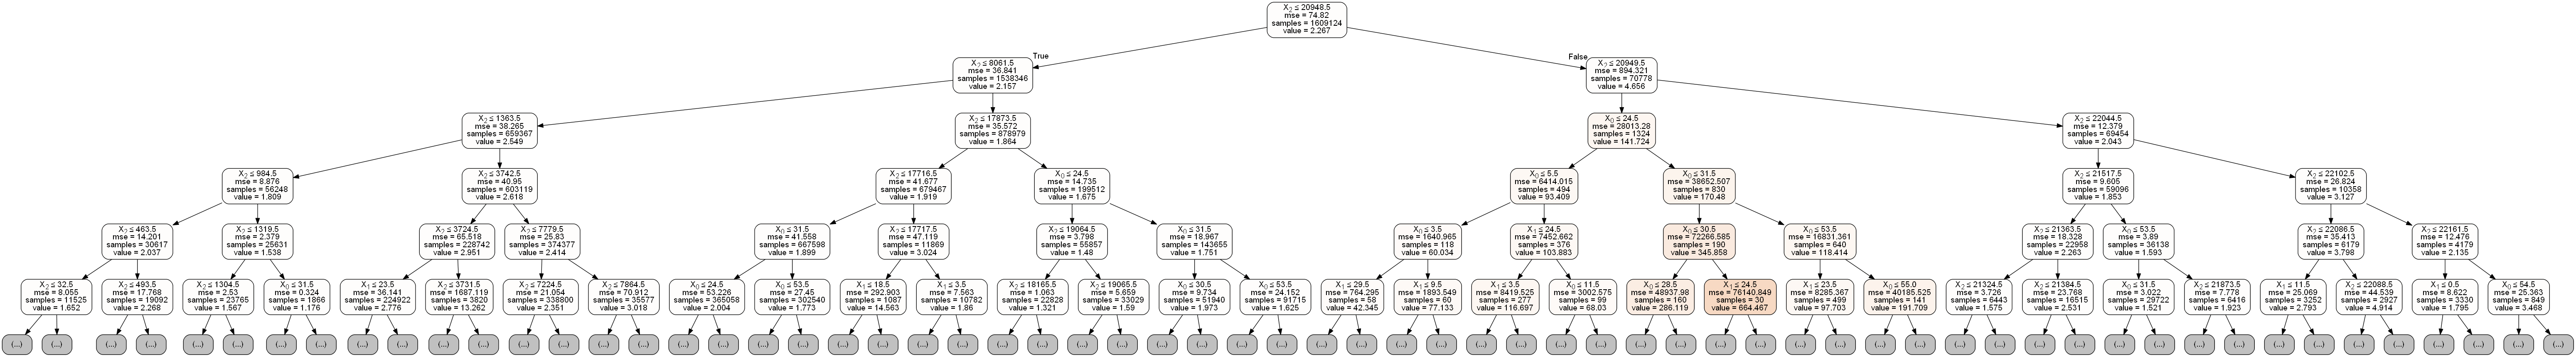

In [25]:

#visualizing decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())